In [1]:
#Importing required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm  
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### Reading the data and basic sanity checks

In [2]:
#Reading the data from text file
meter_data = pd.read_table('household_power_consumption.txt', sep= ';',parse_dates=[['Date','Time']],infer_datetime_format=True,low_memory=False,na_values=['nan','?'])
meter_data.set_index('Date_Time', inplace = True)

#Reading the weather data from csv (web-scraped file)
weather_data= pd.read_csv('weather_data.csv')
weather_data['Date']= pd.to_datetime(weather_data['Date'])
weather_data.set_index('Date', inplace = True)

##### Meter data

In [3]:
print("Shape of the input file is ", meter_data.shape)
print('\n')
print("Data types for columns of the input file is ")
print(meter_data.dtypes)
print('\n')
print("Number of null values per column....")
print(meter_data.isna().sum())
print('\n')
print("The percentage of null values in each column is ")
print(meter_data.isna().sum()*100/meter_data.shape[0])

Shape of the input file is  (2075259, 7)


Data types for columns of the input file is 
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


Number of null values per column....
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


The percentage of null values in each column is 
Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64


In [4]:
#Handling missing values using forward interpolation method for input data file
meter_data.interpolate(method='linear',limit_direction='forward', axis=0, inplace=True)
print("Number of null values per column ")
print(meter_data.isna().sum())

Number of null values per column 
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


##### Weather Data

In [5]:
print("Shape of the weather data file is ", weather_data.shape)
print('\n')
print("Data types for columns of the weather data file is ")
print(weather_data.dtypes)
print('\n')
print("Number of null values per column....")
print(weather_data.isna().sum())
print('\n')
print("The percentage of null values in each column is ")
print(weather_data.isna().sum()*100/weather_data.shape[0])

Shape of the weather data file is  (1465, 6)


Data types for columns of the weather data file is 
Temperature      float64
Dew Point        float64
Humidity         float64
Wind Speed       float64
Pressure         float64
Precipitation    float64
dtype: object


Number of null values per column....
Temperature      0
Dew Point        0
Humidity         0
Wind Speed       0
Pressure         0
Precipitation    0
dtype: int64


The percentage of null values in each column is 
Temperature      0.0
Dew Point        0.0
Humidity         0.0
Wind Speed       0.0
Pressure         0.0
Precipitation    0.0
dtype: float64


### Univariate analysis

The following section contains univariate analysis of all the columns in our dataset. We look at 3 kinds of plots- 
- Histogram and density plots
- Time-series trends at daily, monthly and weekly levels
- Average global active power distribution across hours of a day, days of the week, days of a month, months of a year 

#### Histogram and attribute-wise statistics

##### Meter Data

In [6]:
meter_data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.090280e+00,1.236492e-01,2.408328e+02,4.621481e+00,1.109485e+00,1.289229e+00,6.442386e+00
std,1.052628e+00,1.124194e-01,3.237763e+00,4.424361e+00,6.115843e+00,5.786613e+00,8.415860e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.140000e-01,1.000000e-01,2.410000e+02,2.751585e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


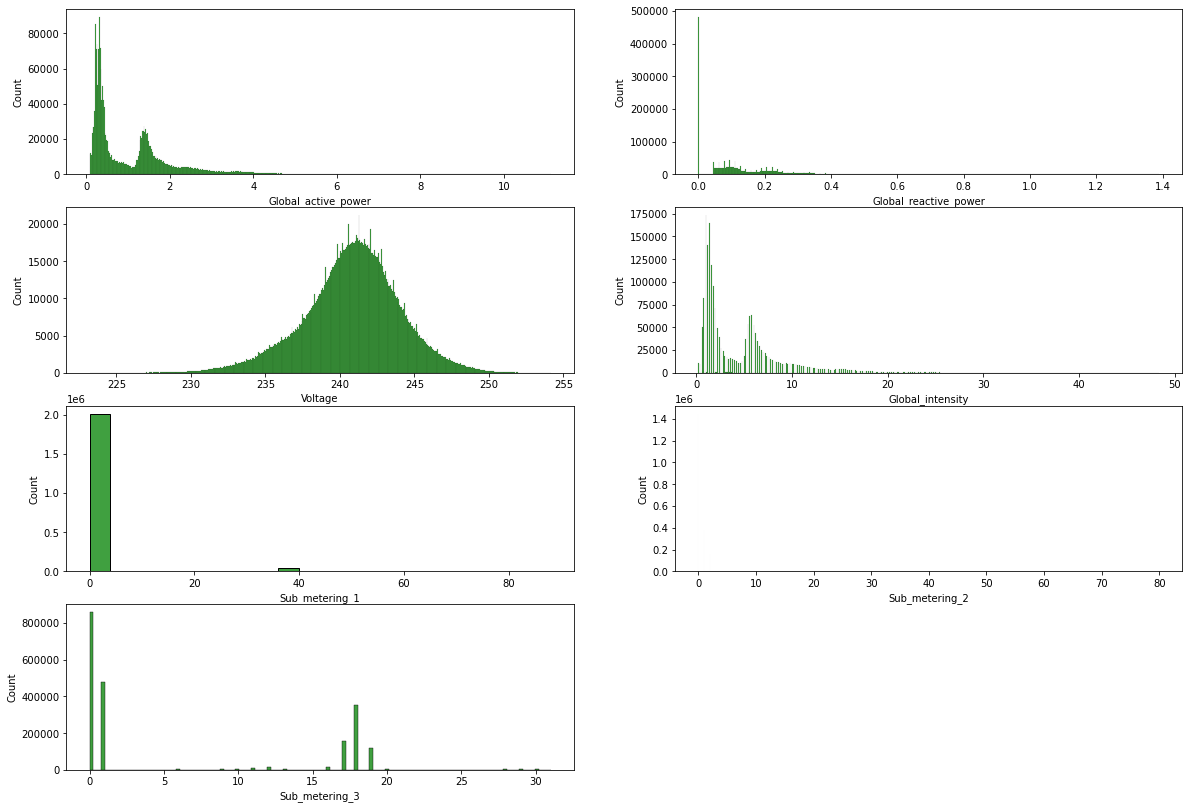

In [7]:
# Checking Distribution of each variable for meter data
plt.figure(figsize=(20, 14))
col_subplot_dict = {1:'Global_active_power',2:'Global_reactive_power',3:'Voltage',4:'Global_intensity',5:'Sub_metering_1',6:'Sub_metering_2', 7: 'Sub_metering_3'}
for key in col_subplot_dict: 
    plt.subplot(4,2,key)
    sns.histplot(meter_data[col_subplot_dict[key]], color='g')

##### Weather Data

In [8]:
weather_data.describe()

,Temperature,Dew Point,Humidity,Wind Speed,Pressure,Precipitation
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.0
mean,52.801911,43.530512,75.960546,8.172150,29.656314,0.0
std,12.060831,11.365031,11.814668,3.516396,0.275532,0.0
min,0.000000,0.000000,0.000000,0.700000,28.300000,0.0
25%,44.600000,37.200000,68.400000,5.600000,29.500000,0.0
50%,53.300000,45.600000,77.100000,7.700000,29.700000,0.0
75%,62.500000,52.300000,85.200000,10.200000,29.800000,0.0
max,79.800000,65.100000,100.000000,22.600000,30.400000,0.0


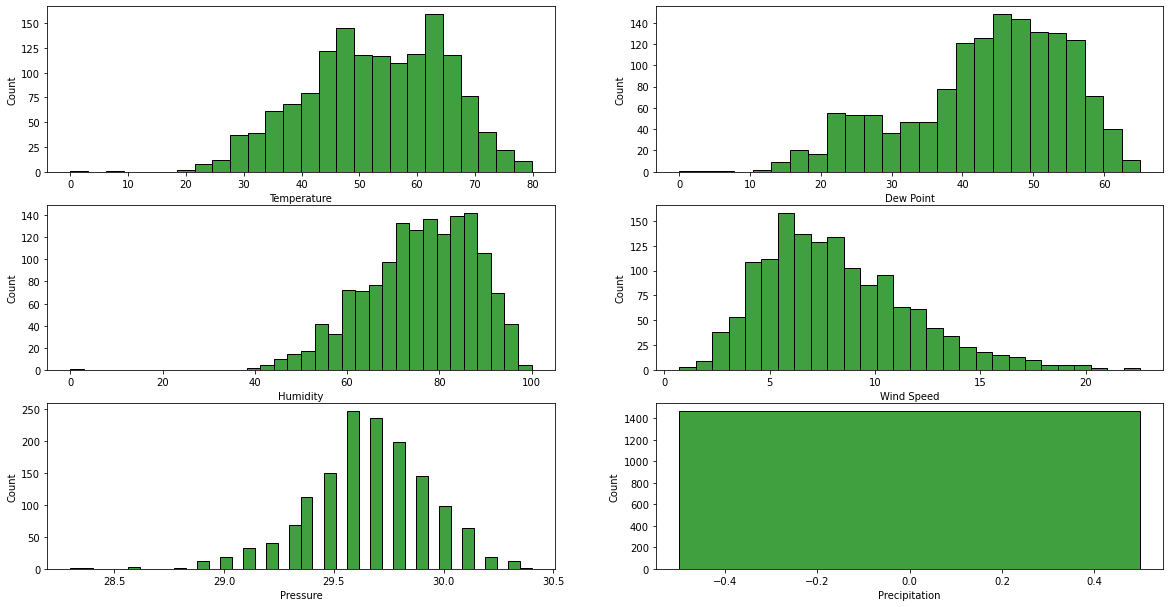

In [9]:
# Checking Distribution of each variable for weather data
plt.figure(figsize=(20, 14))
col_subplot_dict = {1:'Temperature',2:'Dew Point',3:'Humidity',4:'Wind Speed',5:'Pressure',6:'Precipitation'}
for key in col_subplot_dict: 
    plt.subplot(4,2,key)
    sns.histplot(weather_data[col_subplot_dict[key]], color='g')

#### Observation:
    We can drop off the precipitation column from our analysis since it seems to have a single default value. Even in mean and standard deviation it doesn't seem to show any variation in data, hence is not a useful column for our analysis

In [10]:
weather_data.drop('Precipitation', axis = 1, inplace = True)

#### Resampling at daily,weekly and monthly levels and plotting time-series trends for total and average aggregations

##### Meter data

<ipython-input-11-f7f402664107>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,2,figsize=(20, 5))


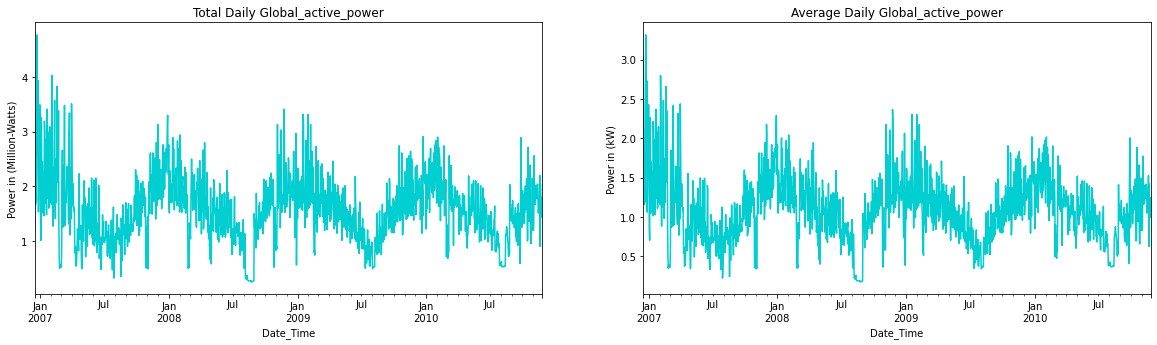

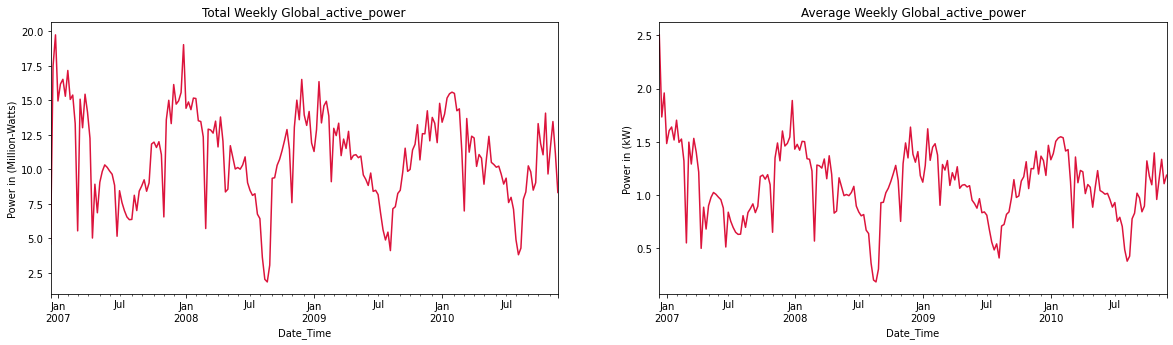

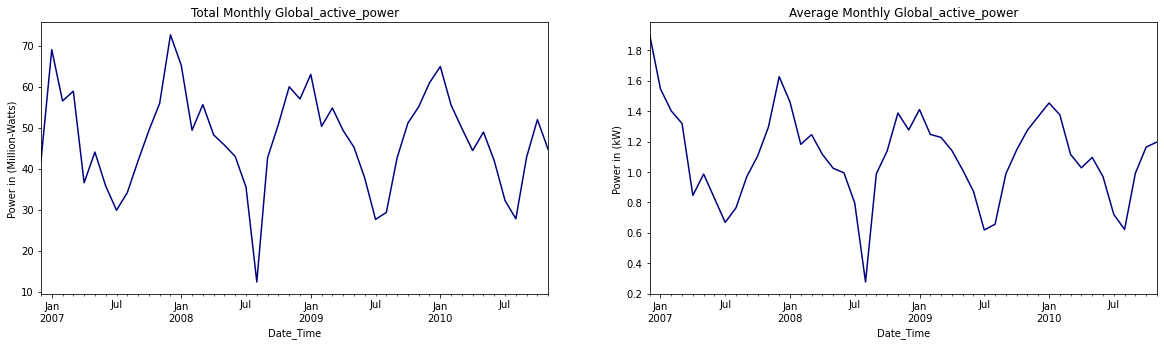

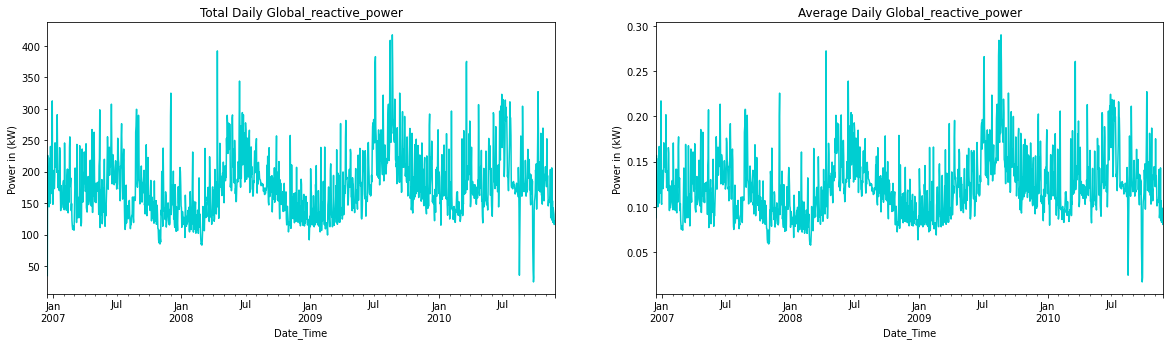

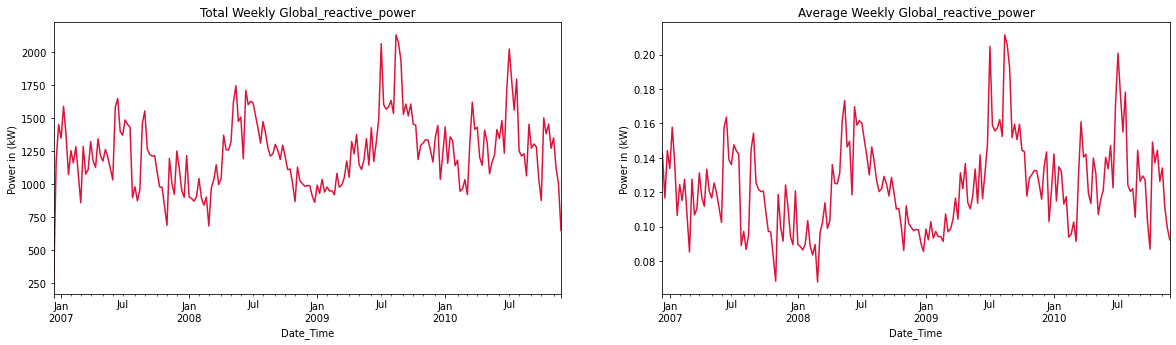

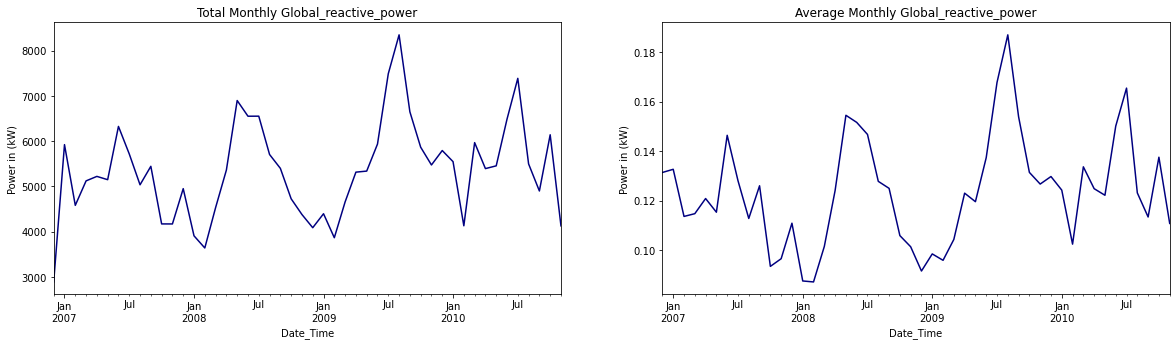

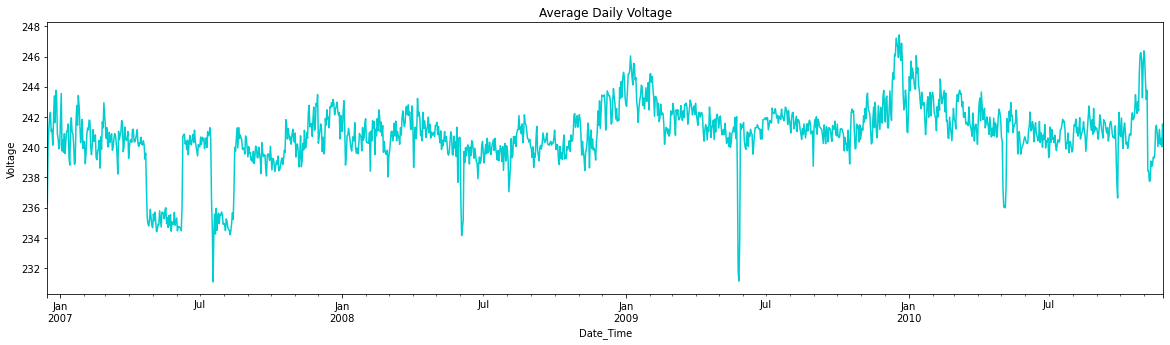

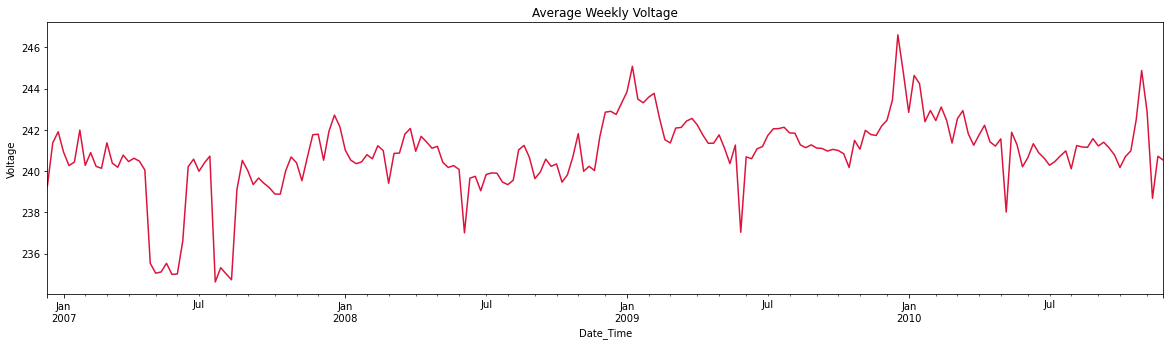

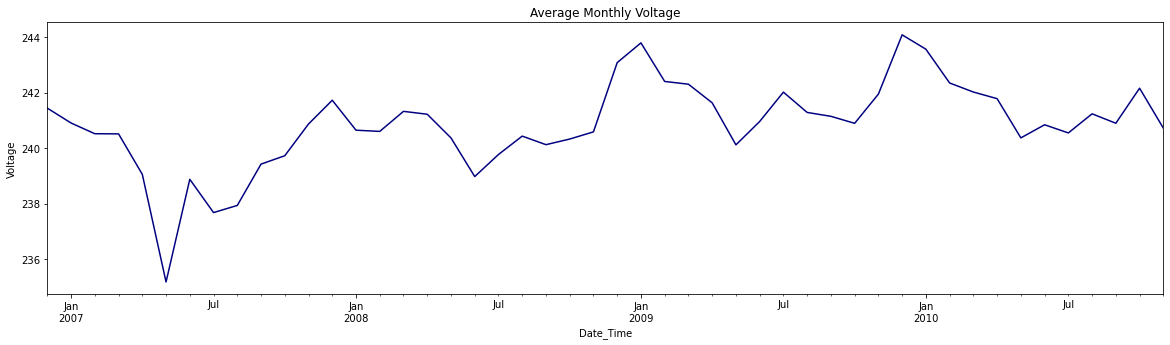

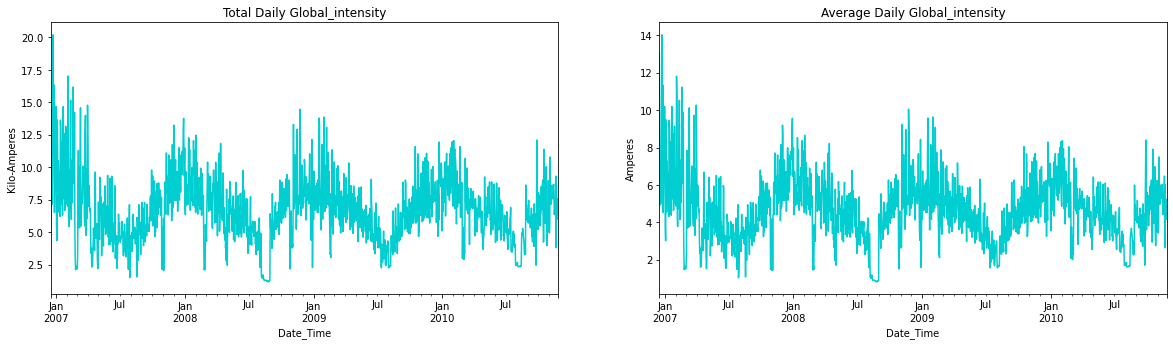

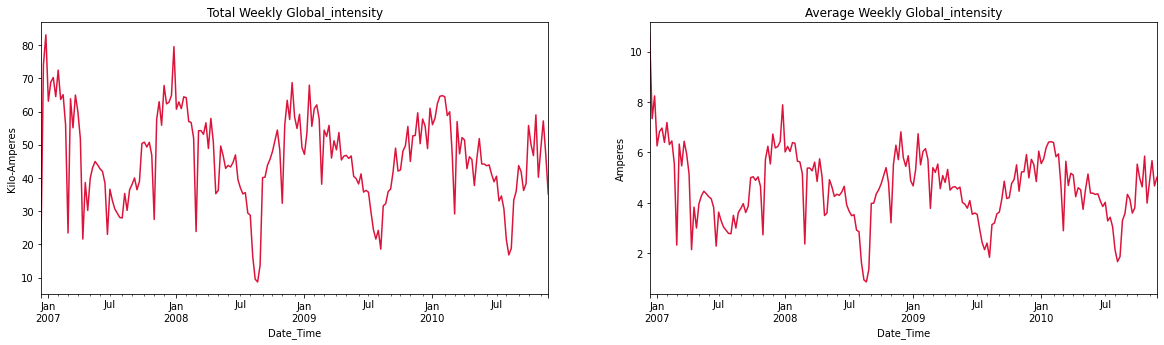

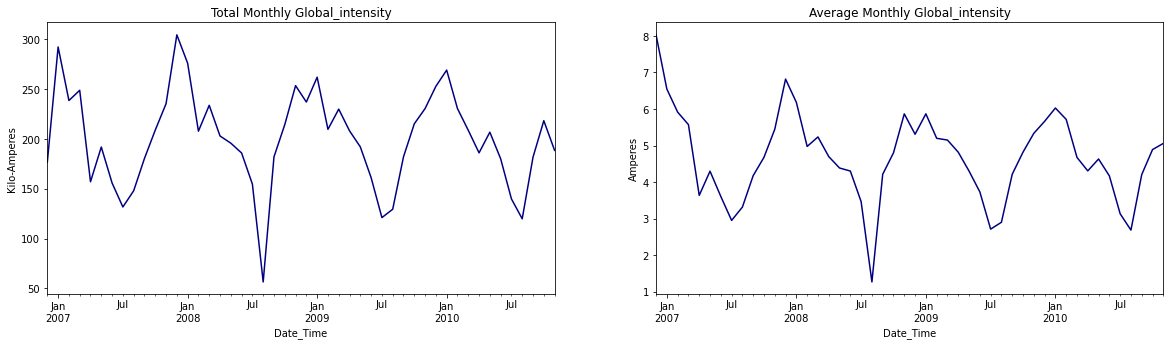

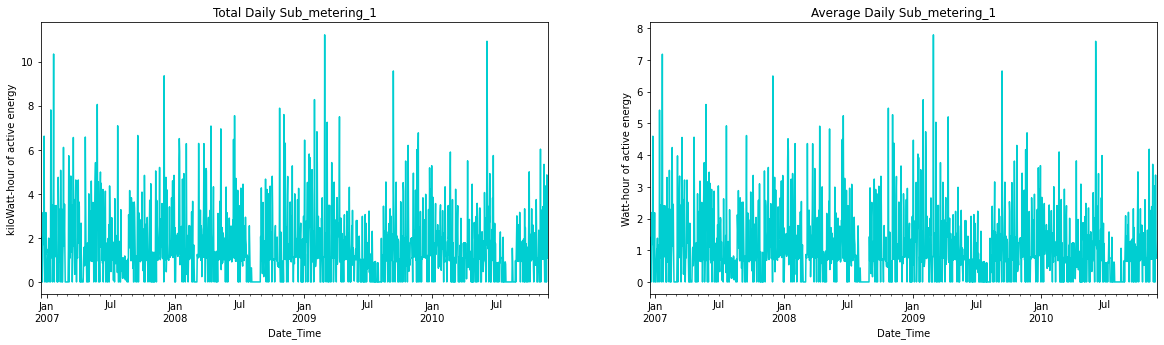

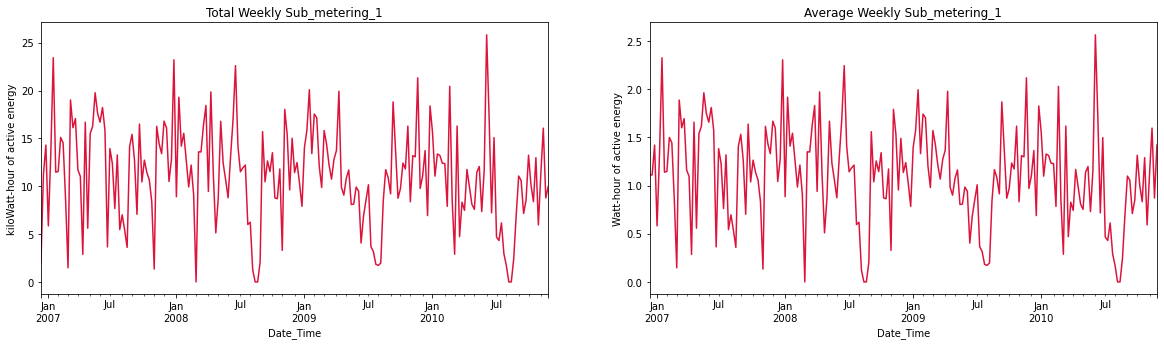

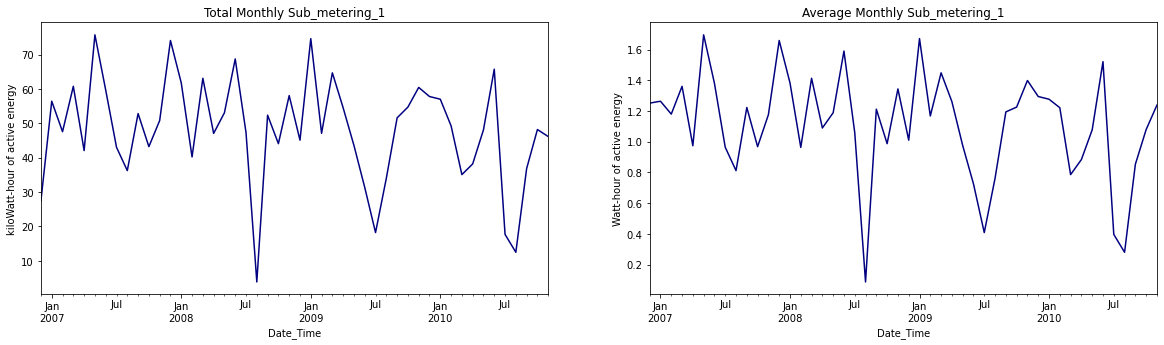

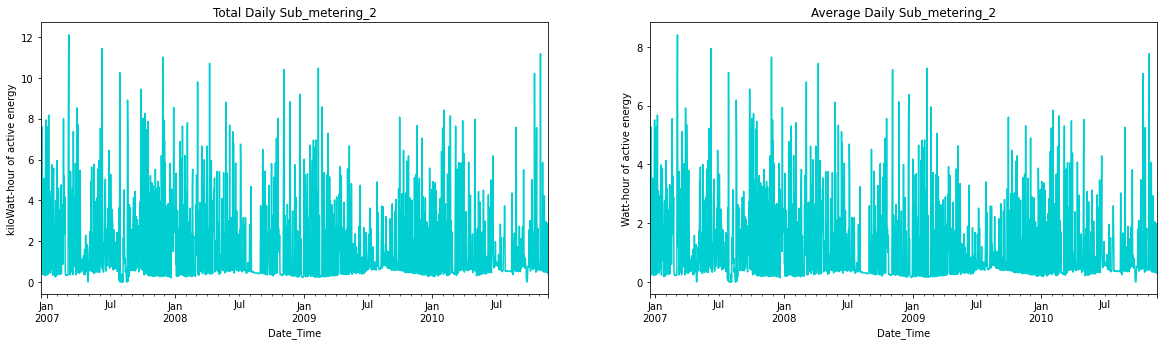

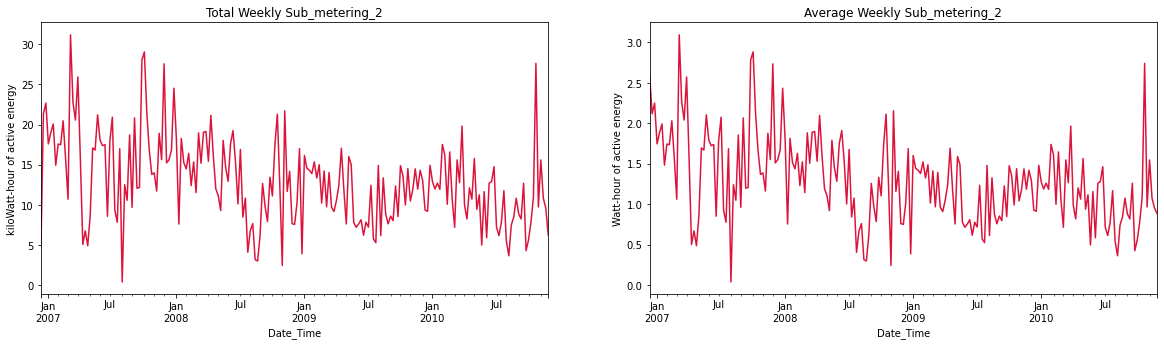

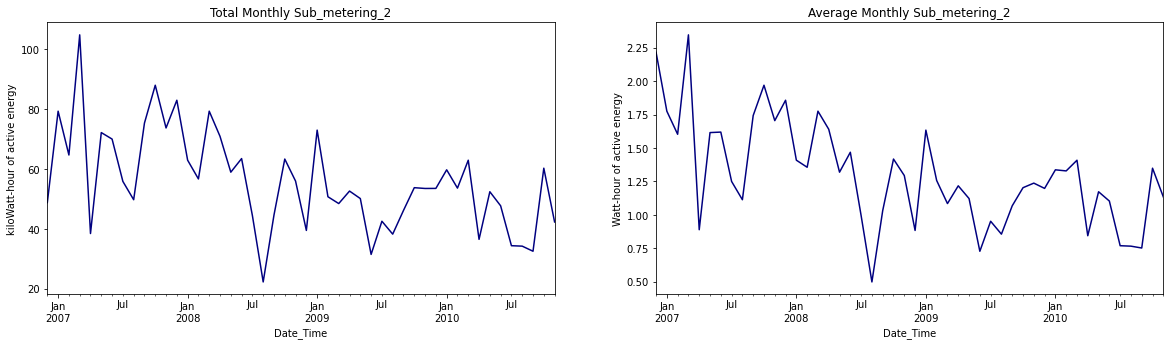

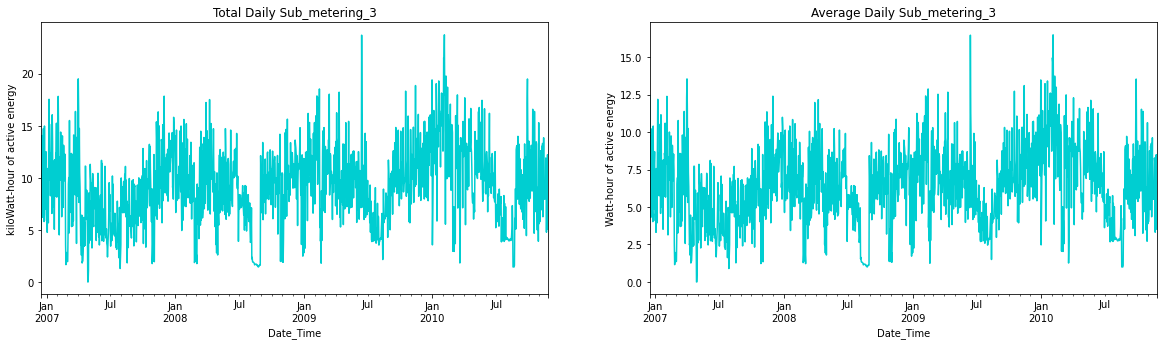

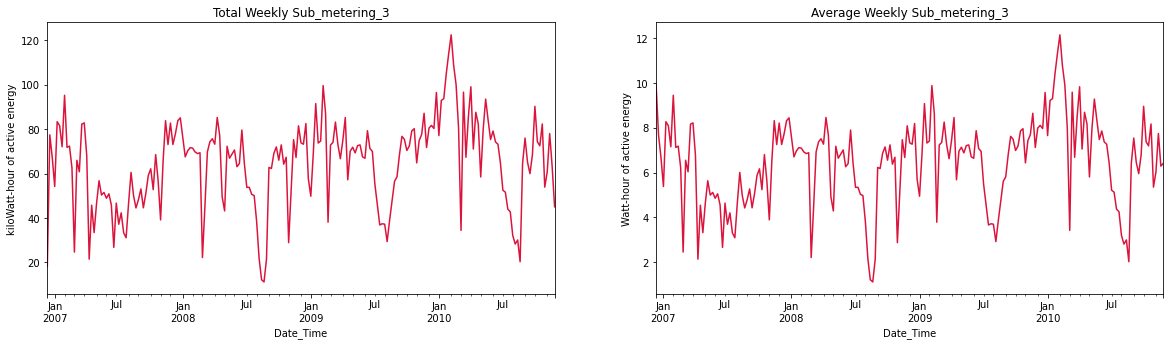

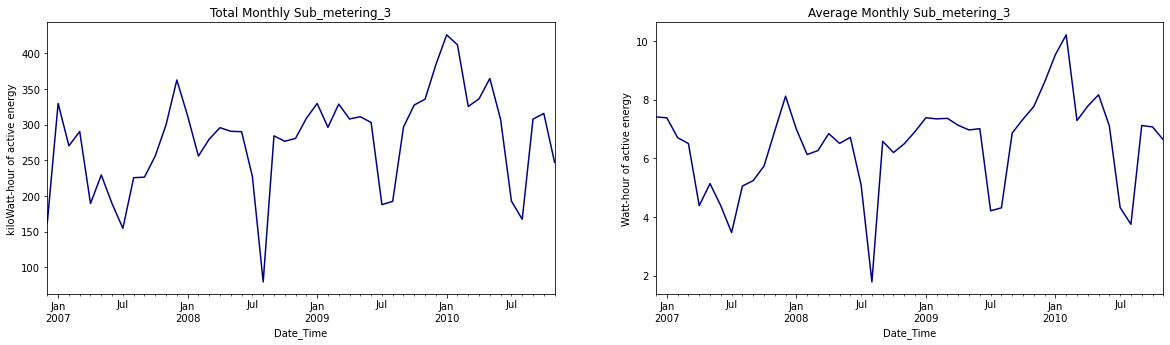

In [11]:
#Some helper dictionaries for better plots
resample_levels = ['D','W','M']
resample_levels_title = {'D':'Daily','W':'Weekly','M':'Monthly'}
resample_levels_color = {'D':'darkturquoise','W':'crimson','M':'navy'}
ylabels_sum = {'Global_active_power':'Power in (Million-Watts)' , 'Global_reactive_power': 'Power in (kW)', 'Voltage': 'Voltage',
       'Global_intensity': 'Kilo-Amperes', 'Sub_metering_1': 'kiloWatt-hour of active energy' , 'Sub_metering_2': 'kiloWatt-hour of active energy' ,
       'Sub_metering_3':'kiloWatt-hour of active energy'}
ylabels_mean = {'Global_active_power':'Power in (kW)' , 'Global_reactive_power': 'Power in (kW)', 'Voltage': 'Voltage',
       'Global_intensity': 'Amperes', 'Sub_metering_1': 'Watt-hour of active energy' , 'Sub_metering_2': 'Watt-hour of active energy' ,
       'Sub_metering_3':'Watt-hour of active energy'}
yticks_divisions_sum = {'Global_active_power':1000 , 'Global_reactive_power': 1, 'Voltage': 1,
       'Global_intensity': 1000, 'Sub_metering_1': 1000, 'Sub_metering_2': 1000 ,
       'Sub_metering_3': 1000}

#Code for generating plots
for col in meter_data.columns:
    if col != 'Voltage':
        for p in resample_levels:
            fig, ax = plt.subplots(1,2,figsize=(20, 5))
            plt.subplot(121)
            meter_data[col].resample(p).apply(lambda x: round(x.sum()/yticks_divisions_sum[col],2)).plot(title='Total '+ resample_levels_title[p] +' ' +col, color=resample_levels_color[p], ylabel = ylabels_sum[col])
            plt.subplot(122)
            meter_data[col].resample(p).mean().plot(title='Average ' + resample_levels_title[p] +' ' + col, color=resample_levels_color[p], ylabel = ylabels_mean[col])
    else:
        for p in resample_levels:
            plt.figure(figsize=(20, 5))
            meter_data[col].resample(p).mean().plot(title='Average ' + resample_levels_title[p] +' ' + col, color=resample_levels_color[p],ylabel = ylabels_mean[col])

##### Weather Data

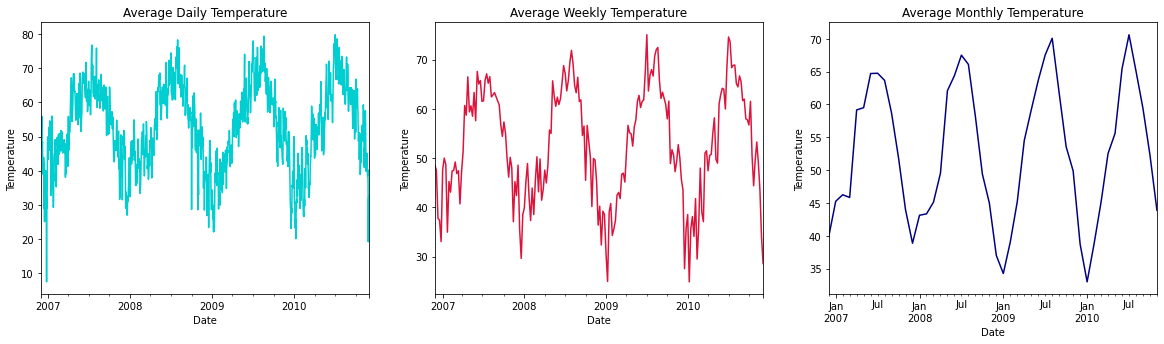

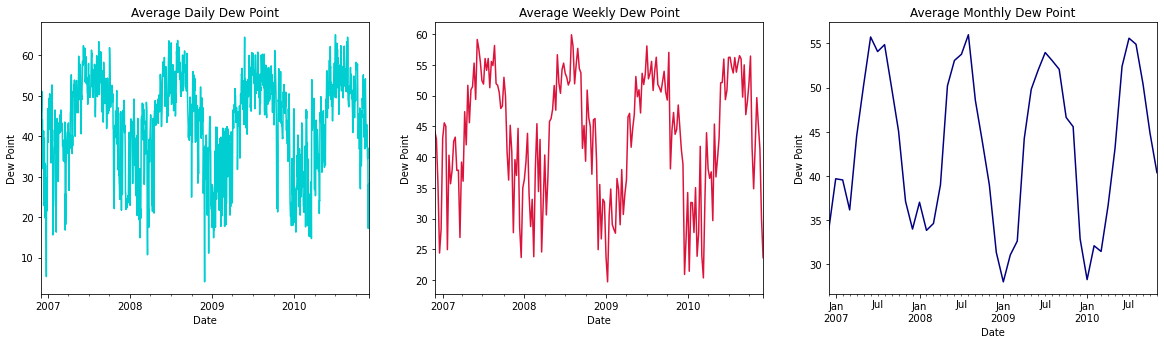

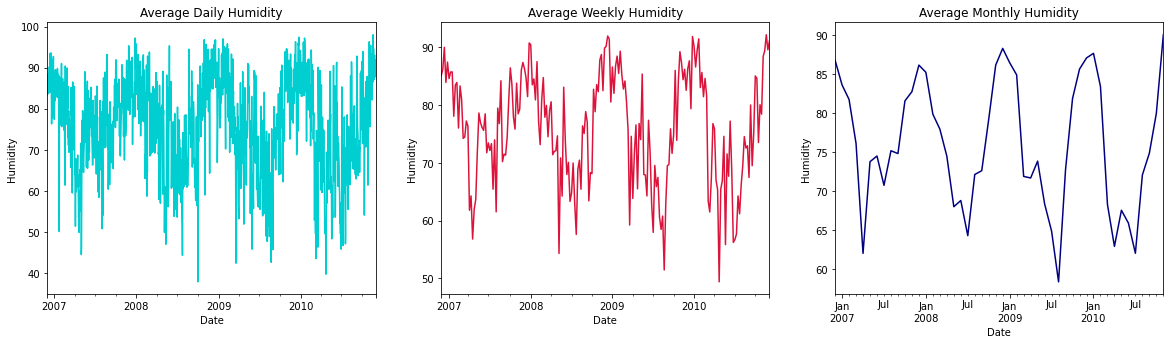

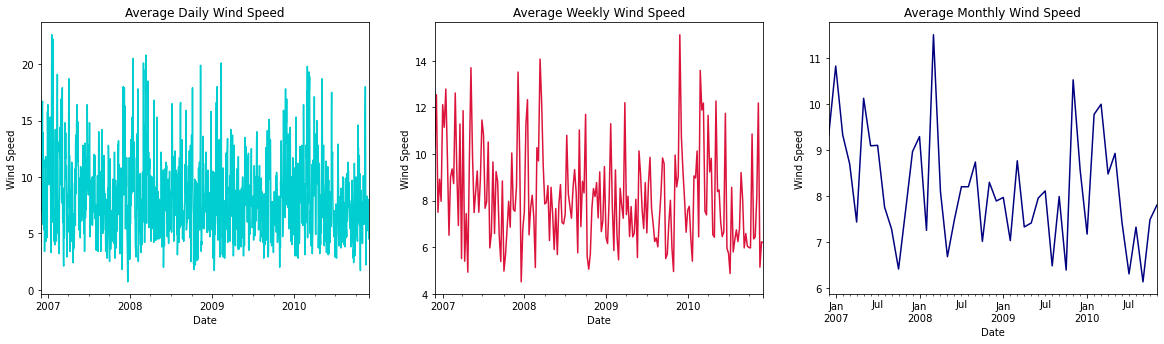

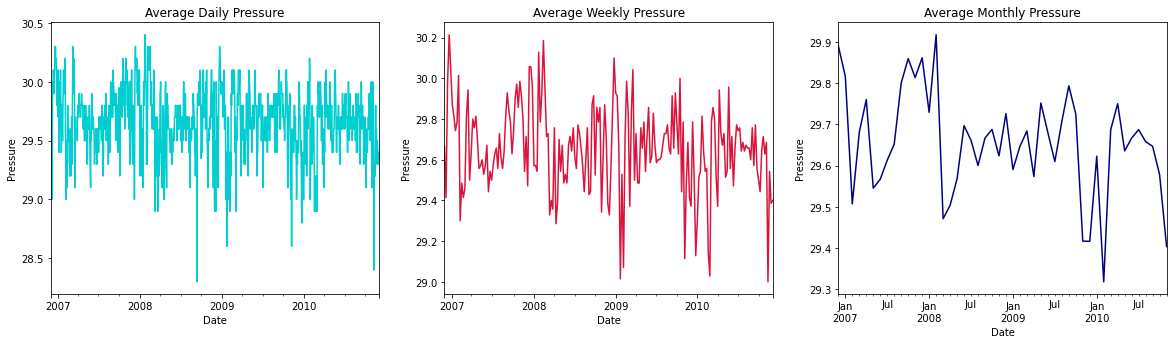

In [12]:
#Some helper dictionaries for better plots
resample_levels_title = {'D':'Daily','W':'Weekly','M':'Monthly'}
resample_levels_color = {'D':'darkturquoise','W':'crimson','M':'navy'}
ylabels_mean = {'Temperature':'Temperature' , 'Dew Point': 'Dew Point', 'Humidity': 'Humidity',
       'Wind Speed': 'Wind Speed', 'Pressure': 'Pressure'}

#Code for generating plots
for col in weather_data.columns:
    fig, ax = plt.subplots(1,3,figsize=(20, 5))
    plt.subplot(131)
    weather_data[col].resample('D').mean().plot(title='Average ' + resample_levels_title['D'] +' ' + col, color=resample_levels_color['D'], ylabel = ylabels_mean[col])
    plt.subplot(132)
    weather_data[col].resample('W').mean().plot(title='Average ' + resample_levels_title['W'] +' ' + col, color=resample_levels_color['W'], ylabel = ylabels_mean[col])
    plt.subplot(133)
    weather_data[col].resample('M').mean().plot(title='Average ' + resample_levels_title['M'] +' ' + col, color=resample_levels_color['M'], ylabel = ylabels_mean[col])

#### Inference:
- We see that for all attributes except voltage, sum and average aggregations for resampled data have same trends in their time-series distributions. Hence we can use either sum or average interchangably. 
- We will predict the total Global Active Power for daily, monthly and weekly period instead of average Global Active Power because total (sum) value will be a close approximation to the actual power consumed.
- For external weather data, we see some seasonal trend at monthly level for average temperature, dew point and humidity. Windspeed and pressure do not have strong discernable patterns, never the less we perform bivariate analysis to establish whether they are related to our response variable (Global Active Power)

#### Understanding the average global active power distribution across hours of a day, days of the week, days of a month, months of a year

Text(0, 0.5, 'Power (in kW)')

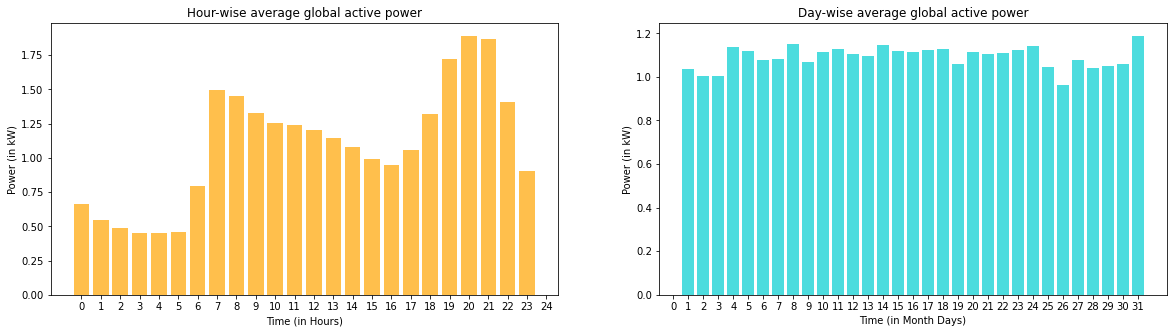

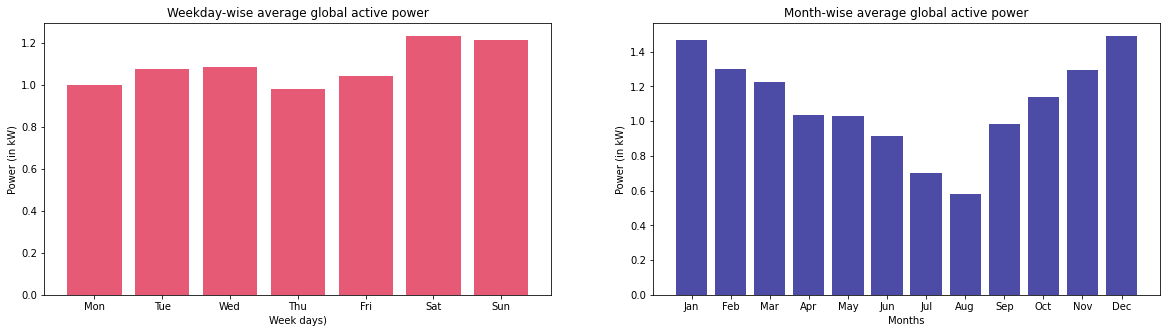

In [13]:
#Helper dictionaries for better plots:
weekday_dict = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
month_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun', 7: 'Jul', 8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

#Grouping by time periods(Hour, Day,Week,Month) and calculating average global active power
Hourwise_gap = meter_data['Global_active_power'].groupby(meter_data.index.hour).mean().reset_index()
Daywise_gap = meter_data['Global_active_power'].groupby(meter_data.index.day).mean().reset_index()
Weekdaywise_gap = meter_data['Global_active_power'].groupby(meter_data.index.weekday).mean().reset_index()
Weekdaywise_gap.replace({"Date_Time": weekday_dict}, inplace = True)
Monthwise_gap = meter_data['Global_active_power'].groupby(meter_data.index.month).mean().reset_index()
Monthwise_gap.replace({"Date_Time": month_dict}, inplace = True)


fig, ax = plt.subplots(figsize=(20, 5))

plt.subplot(121)
plt.bar(Hourwise_gap['Date_Time'],Hourwise_gap['Global_active_power'], color='orange',alpha=0.7)
plt.title('Hour-wise average global active power')
plt.xlabel('Time (in Hours)')
plt.ylabel('Power (in kW)')
plt.xticks(np.arange(0, 25, 1.0))

plt.subplot(122)
plt.bar(Daywise_gap['Date_Time'],Daywise_gap['Global_active_power'], color = 'darkturquoise',alpha=0.7)
plt.title('Day-wise average global active power')
plt.xlabel('Time (in Month Days)')
plt.ylabel('Power (in kW)')
plt.xticks(np.arange(0, 32, 1.0))


fig, ax = plt.subplots(1,2,figsize=(20, 5))
plt.subplot(121)
plt.bar(Weekdaywise_gap['Date_Time'],Weekdaywise_gap['Global_active_power'], color ='crimson',alpha=0.7)
plt.title('Weekday-wise average global active power')
plt.xlabel('Week days)')
plt.ylabel('Power (in kW)')


plt.subplot(122)
plt.bar(Monthwise_gap['Date_Time'],Monthwise_gap['Global_active_power'], color ='navy',alpha=0.7)
plt.title('Month-wise average global active power')
plt.xlabel('Months')
plt.ylabel('Power (in kW)')

#### Inference:
- The power consumption suddenly increases at around 7 am every morning, presumably because everyone in this household starts getting ready for their work/school. The power consumption then steadily decreases before again sharply increasing from around 6 pm in the evenings when presumably everyone returns home, and then goes down at 10pm closer to sleep time.
- The daily power is more-or-less constant, with a slight dip in first 2-3 days of the month and on 26th of the month. These may be due to isolated outage incidents which have affected the overall mean. A further investigation is required. 
- The weekly distribution of power sightly higher during the weekends, presumably because the household members are at home and engaging in household tasks. A further investigation into submeter readings may help us understand where the power consumption is increasing during the weekends. 

#### Course of action:
- Once we predict the daily values of total Global Active Power, we will use the hourly distribution trends to give an approximate fraction of total power consumed in each hour, but we will not carry out any predictions at hourly scale. 


### Bivariate analysis

- In this section correlations between the attributes may help us understand which readings most affect the global active power reading. 

- We do a simple correlation between attriutes of just df data, and then we look at correlation between global active power and weather data variables. Both these correlations are checked at weekly level of data, daily levels correlations are susceptible to noise (we have cross-checked this fact) 

- Before we do all of this, we first resample data at daily, weekly and monthly levels and create our helper data frames. These will then be sued for both bivariate analysis as well as for modeling using SVR

In [14]:
#Resampling meter data at daily, weekly and monthly levels
meter_data_daily = pd.DataFrame(meter_data['Global_active_power'].resample('D').sum())
meter_data_weekly = pd.DataFrame(meter_data['Global_active_power'].resample('W').sum())
meter_data_monthly = pd.DataFrame(meter_data['Global_active_power'].resample('M').sum())
meter_data_weekly_all = meter_data.resample('W').sum()

#Resampling meter data at daily, weekly and monthly levels
weather_data_daily  = weather_data.copy()
weather_data_weekly  = weather_data.resample('W').mean()
weather_data_monthly  = weather_data.resample('M').mean()

#Merge the response column from meter data with weather data for daily, weekly and monthly data
weather_response_daily = weather_data_daily.merge(meter_data_daily, left_index = True,right_index = True)
weather_response_weekly = weather_data_weekly.merge(meter_data_weekly, left_index = True,right_index = True)
weather_response_monthly = weather_data_monthly.merge(meter_data_monthly, left_index = True,right_index = True)

##### Meter data

<AxesSubplot:>

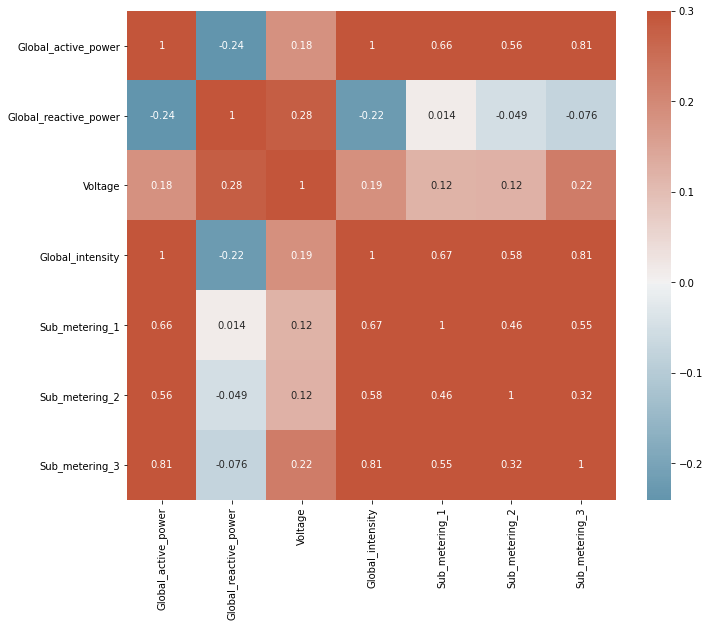

In [15]:
#Correlation matrix
corr_meter_data_weekly = meter_data_weekly_all.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr_meter_data_weekly,cmap=cmap, vmax=.3, center=0, square=True,annot=True)

<Figure size 432x288 with 0 Axes>

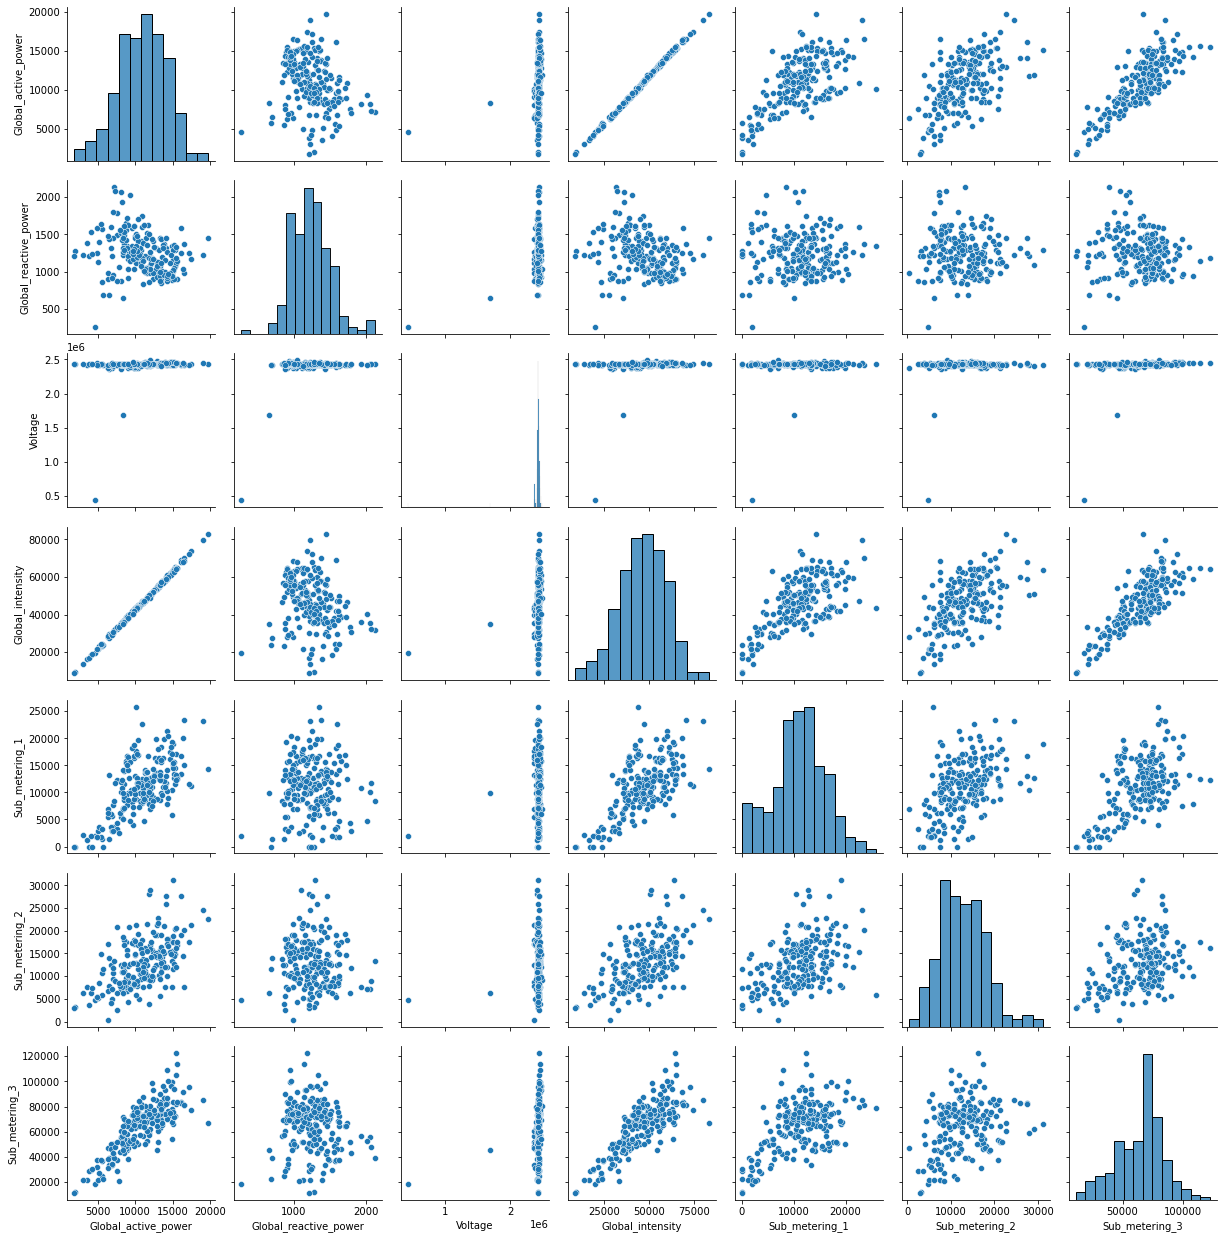

In [16]:
#Scatter plot for meter data resampled at weekly level
plt.figure()
sns.pairplot(meter_data_weekly_all)
plt.show()

##### Weather data along with response

<AxesSubplot:>

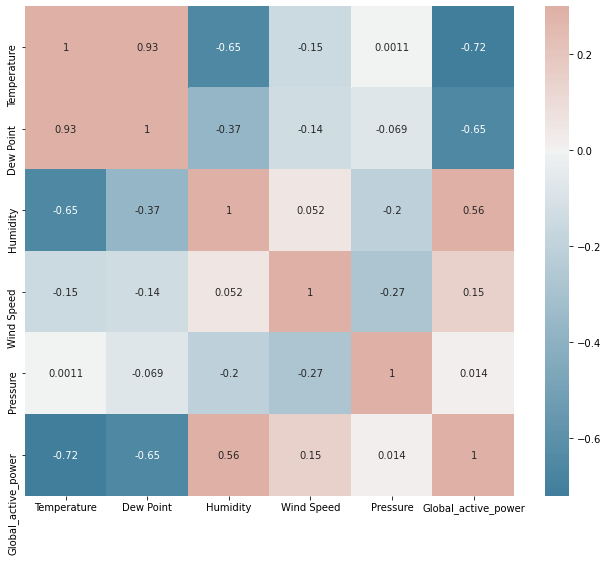

In [17]:
#Correlation matrix
corr_weather_response_weekly = weather_response_weekly.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr_weather_response_weekly,cmap=cmap, vmax=.3, center=0, square=True,annot=True)

<Figure size 432x288 with 0 Axes>

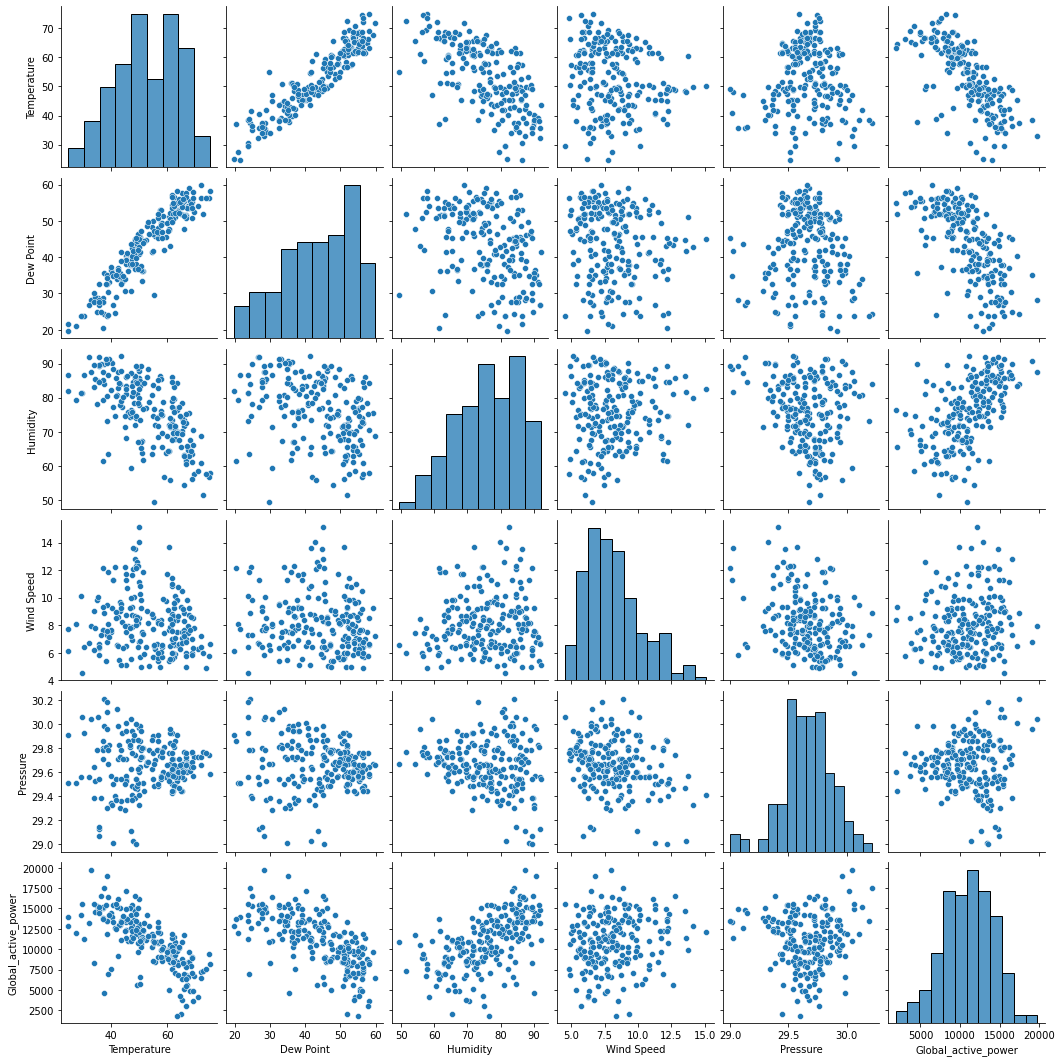

In [18]:
# Scatter plots for weather response data at weekly level
plt.figure()
sns.pairplot(weather_response_weekly)
plt.show()

#### Inference:
- As it was expected, the global reactive power is almost un-correlated with any other attribute because this is equivalent to baseline or white-noise power that will always exist on the line even when there are no active devices.

- Since the formula for power directly depends on current, it comes as no surprise that there is a 100% correlation between global active power and global intensity (which is basically the current on the line). This correlation is also clearly evident from the time-series plots for both these attributes which have the same trend. 

- The global active power has a reasonable correlation with sub meter readings, although these submeters themselves have little correlation among each other - this makes sense because these submeters are capturing readings from different sets of devices and it is natural to see minimal or even no correlation between them. It may have been a cause of concern if there was a strong correlation amongst sub_meter readings - which would have indicated that there are overlapping devices between these sub_meters

- The global active power has weak negative correlations with temperature and dew point, a weak positive correlation with humidiy. Windspeed and pressure do not seem to be very influencing factors for this response variable. Temperature and dew point have a strong positive correlation with one another, hence we can drop one of them from our analysis. We drop 'Dew Point'

- Although not shown here, the correlation plots between response variable and weather data were calculated at daily and monthly level, and their trends conform with what is observed at weekly level. The correlations are slightly stronger at weekly and monthly levels (as the values become more robust to noise in the data) as compared to daily levels. Nevertheless, weekly values are good estimates of correlation among variables.

In [19]:
#We drop the pressure and dew point columns from the predictor variables because it is almost independent of the response variable. 
weather_response_daily.drop(['Dew Point','Pressure'],axis = 1, inplace = True)
weather_response_weekly.drop(['Dew Point','Pressure'],axis = 1, inplace = True)
weather_response_monthly.drop(['Dew Point','Pressure'],axis = 1, inplace = True)

### Modeling

#### Support Vector Regression
- The actual modeling code has been put in a function called SVR_model. This function has following sub-sections:
    - Manual Train Test split of data. First 75% rows are used for training, the next 25% rows are used for testing. 
    - Scaling the data (both x and y variables) using standard scaler
    - Actual model SVR fit for linear and rbf kernels
    - Plotting the predicted values against actual values for SVR for linear and rbf kernels.
    - Printing out the evaluation metric values RMSE, Rsquared and Adjusted Rsquared. 
    
    
- The SVR_model function is called for daily, weekly and monthly predictions. 

In [20]:
weather_response_daily.head() #Sanity check

,Temperature,Humidity,Wind Speed,Global_active_power
2006-12-16,42.2,90.0,8.5,1209.176
2006-12-17,25.1,93.6,3.4,3390.460
2006-12-18,38.1,91.6,5.0,2203.826
2006-12-19,36.0,82.3,11.5,1666.194
2006-12-20,36.6,76.3,10.9,2225.748


##### Handling date encoding in time-series
- We cannot use the dates directly, but instead encode the date information by creating a dummy column which will correspond to row number of our dataset. 
- Eg. day 1 will have value 1, day 2 will have value 2 .... day 2000 will have value 2000. These will be our X values. 
- y value will be the Global Active Power that we wish to predict, and predictor variables are Temperature 


In [21]:
weather_response_daily.insert(2,'date_const',np.arange(len(weather_response_daily)) + 1)
weather_response_weekly.insert(2,'date_const',np.arange(len(weather_response_weekly)) + 1)
weather_response_monthly.insert(2,'date_const',np.arange(len(weather_response_monthly)) + 1)

In [22]:
weather_response_weekly.head()

,Temperature,Humidity,date_const,Wind Speed,Global_active_power
2006-12-17,37.742857,90.028571,1,7.500000,4599.636
2006-12-24,37.400000,83.942857,2,8.914286,17477.618
2006-12-31,33.042857,87.457143,3,7.971429,19749.552
2007-01-07,47.671429,84.614286,4,12.114286,14961.068
2007-01-14,49.985714,85.742857,5,11.142857,16179.547


In [23]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [24]:
def SVR_model(X,params_dict):
    #Splitting the data into train and test sets. Since we are dealing with time-series data we cannot split it into randomized split. It must be a sequential split.
    #Here we are using first 75% data for training and 25% data for testing
    X_train = X.iloc[:int(X.shape[0]*0.75)+1,:-1]
    X_test = X.iloc[int(X.shape[0]*0.75)+1:,:-1]
    y_train = X.iloc[:int(X.shape[0]*0.75)+1,-1]
    y_test = X.iloc[int(X.shape[0]*0.75)+1:,-1]
    
    test_dates = X_test.index

    y_train = y_train.values.reshape(len(y_train),1)
    y_test = y_test.values.reshape(len(y_test),1)

    ####Scaling the data after train-test split
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X_train_normalized = sc_X.fit_transform(X_train)
    X_test_normalized = sc_X.transform(X_test)
    y_train_normalized = sc_y.fit_transform(y_train)
    y_test_normalized = sc_y.transform(y_test)


    ####testing for linear and RBF kernels
    svr_rbf = SVR(kernel= 'rbf', epsilon=params_dict['epsilon_rbf'], gamma = params_dict['gamma_rbf'], C = params_dict['C_rbf'])
    svr_rbf.fit(X_train_normalized, y_train_normalized)
    y_pred_rbf = svr_rbf.predict(X_test_normalized)
    y_pred_rbf = sc_y.inverse_transform(y_pred_rbf) #inverted normalized values
    
    svr_lin = SVR(kernel= 'linear', epsilon=params_dict['epsilon_lin'], C = params_dict['C_lin'])
    svr_lin.fit(X_train_normalized, y_train_normalized)
    y_pred_lin = svr_lin.predict(X_test_normalized)
    y_pred_lin = sc_y.inverse_transform(y_pred_lin) #inverted normalized values
    
    ####Plotting the figures
    plt.figure(figsize = (12,6))
    plt.plot(X_test.index, y_test, color= 'navy', label= 'Data')
    plt.plot(X_test.index, y_pred_lin, color= 'yellow', label= 'Linear SVR model')
    plt.plot(X_test.index, y_pred_rbf, color= 'turquoise', label= 'RBF model') 
    plt.xlabel('Date')
    plt.ylabel('Total global active power')
    plt.legend()
    plt.show()
    
    ####Evaluation metrics
    #R-squared value:
    r2_rbf = r2_score(y_test, y_pred_rbf)
    r2_lin = r2_score(y_test, y_pred_lin)
    print("R2 value for rbf kernel SVR ",r2_rbf)
    print("R2 value for linear kernel SVR ",r2_lin)
    print('\n')

    #djusted R-squared value:
    adjusted_r2_rbf= 1 - (1-r2_rbf)*(len(y_test)-1)/(len(y_test)-3)
    adjusted_r2_lin= 1 - (1-r2_lin)*(len(y_test)-1)/(len(y_test)-3)
    print("Adjusted R2 value for rbf kernel SVR ", adjusted_r2_rbf)
    print("Adjusted R2 value for linear kernel SVR ",adjusted_r2_lin)
    print('\n')

    #RMSE value:
    print("RMSE value for rbf kernel SVR ", mean_squared_error(y_test, y_pred_rbf,squared = False))
    print("RMSE value for linear kernel SVR ", mean_squared_error(y_test, y_pred_lin,squared = False))
    print('\n')
    
    #MAPE value:
    print("MAPE value for rbf kernel SVR ", MAPE(y_test,y_pred_rbf))
    print("MAPE value for linear kernel SVR ", MAPE(y_test,y_pred_lin))
    print('\n')
    
    #MAE value:
    print("MAE value for rbf kernel SVR ", mean_absolute_error(y_test, y_pred_rbf))
    print("MAE value for linear kernel SVR ", mean_absolute_error(y_test, y_pred_lin))
    print('\n')
    
    
    
    return (test_dates,y_test,y_pred_lin,y_pred_rbf)

In [25]:
#Best parameters values based on trial and error:
daily_params = {"epsilon_rbf" :0.001, "gamma_rbf" : 0.05, "C_rbf" : 0.1,"epsilon_lin" : 0.001, "C_lin" : 0.01}
weekly_params = {"epsilon_rbf" :0.01, "gamma_rbf" : 0.01, "C_rbf" : 4,"epsilon_lin" : 0.01, "C_lin" : 0.01}
monthly_params = {"epsilon_rbf" :0.001, "gamma_rbf" : 0.01, "C_rbf" : 4,"epsilon_lin" : 0.001, "C_lin" : 4}

C:\Users\krish\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\krish\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


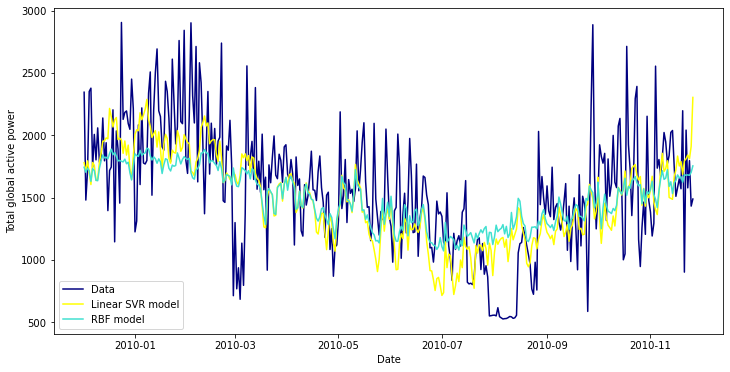

R2 value for rbf kernel SVR  0.3167583619035612
R2 value for linear kernel SVR  0.29273472401506284


Adjusted R2 value for rbf kernel SVR  0.31294136951196105
Adjusted R2 value for linear kernel SVR  0.2887835213559291


RMSE value for rbf kernel SVR  414.2966188515253
RMSE value for linear kernel SVR  421.51729107778874


MAPE value for rbf kernel SVR  34.1423227856848
MAPE value for linear kernel SVR  37.44296342627754


MAE value for rbf kernel SVR  321.9635178444436
MAE value for linear kernel SVR  332.3981668807244




In [26]:
#SVR modeling for daily data:
X = weather_response_daily.copy()
test_dates_daily, y_test_daily, y_pred_lin_daily, y_pred_rbf_daily = SVR_model(X,daily_params)

C:\Users\krish\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\krish\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


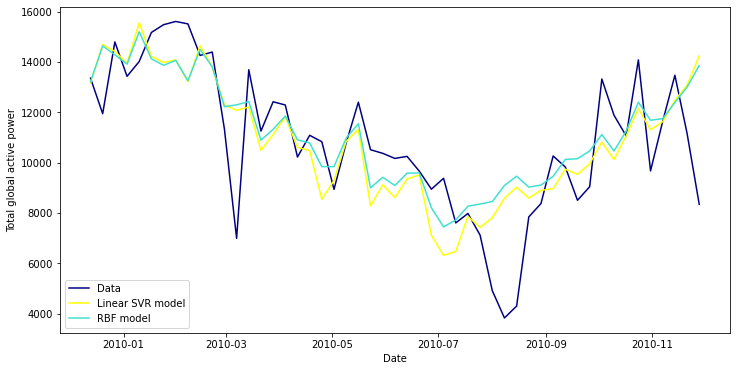

R2 value for rbf kernel SVR  0.5367855641190503
R2 value for linear kernel SVR  0.5187254866819131


Adjusted R2 value for rbf kernel SVR  0.5174849626240108
Adjusted R2 value for linear kernel SVR  0.49867238196032615


RMSE value for rbf kernel SVR  1928.93263589186
RMSE value for linear kernel SVR  1966.1762690159326


MAPE value for rbf kernel SVR  31.908257787377774
MAPE value for linear kernel SVR  32.84887970780929


MAE value for rbf kernel SVR  1378.5407913929857
MAE value for linear kernel SVR  1444.5142383998352




In [27]:
#SVR modeling for weekly data:
X = weather_response_weekly.copy()
test_dates_weekly, y_test_weekly, y_pred_lin_weekly, y_pred_rbf_weekly = SVR_model(X,weekly_params)

C:\Users\krish\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\krish\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


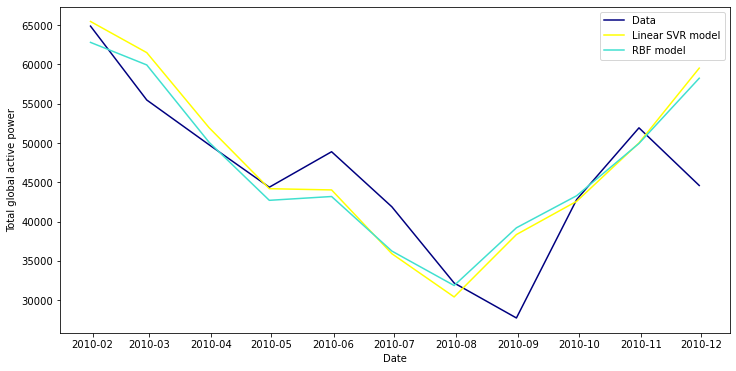

R2 value for rbf kernel SVR  0.6098161586128668
R2 value for linear kernel SVR  0.581701153352651


Adjusted R2 value for rbf kernel SVR  0.5122701982660834
Adjusted R2 value for linear kernel SVR  0.47712644169081386


RMSE value for rbf kernel SVR  6131.320708438431
RMSE value for linear kernel SVR  6348.377250995723


MAPE value for rbf kernel SVR  26.5246830605126
MAPE value for linear kernel SVR  28.09192977933936


MAE value for rbf kernel SVR  4342.041328267304
MAE value for linear kernel SVR  4479.969843039129




In [28]:
#SVR modeling for monthly data:
X = weather_response_monthly.copy()
test_dates_monthly, y_test_monthly, y_pred_lin_monthly, y_pred_rbf_monthly = SVR_model(X,monthly_params)

In [29]:
daily_predictions = pd.DataFrame()
daily_predictions['Date'] = pd.Series(test_dates_daily)
daily_predictions['Y_Actual'] = pd.Series(y_test_daily[:,0])
daily_predictions['Y_predicted_lin'] = pd.Series(y_pred_lin_daily)
daily_predictions['Y_predicted_rbf'] = pd.Series(y_pred_rbf_daily)
daily_predictions


,Date,Y_Actual,Y_predicted_lin,Y_predicted_rbf
0,2009-12-02,2345.668,1779.963932,1743.192909
1,2009-12-03,1479.688,1709.016214,1703.459222
2,2009-12-04,1711.294,1794.143354,1735.845590
3,2009-12-05,2351.762,1700.805048,1714.953550
4,2009-12-06,2378.288,1604.249135,1629.794042
...,...,...,...,...
356,2010-11-22,2041.536,1811.114946,1679.087225
357,2010-11-23,1577.536,1841.359726,1682.102762
358,2010-11-24,1796.248,1810.848249,1677.931642
359,2010-11-25,1431.164,1911.218905,1702.607185


In [30]:
weekly_predictions = pd.DataFrame()
weekly_predictions['Date'] = pd.Series(test_dates_weekly)
weekly_predictions['Y_Actual'] = pd.Series(y_test_weekly[:,0])
weekly_predictions['Y_predicted_lin'] = pd.Series(y_pred_lin_weekly)
weekly_predictions['Y_predicted_rbf'] = pd.Series(y_pred_rbf_weekly)
weekly_predictions

,Date,Y_Actual,Y_predicted_lin,Y_predicted_rbf
0,2009-12-13,13350.698000,13161.359477,13206.234475
1,2009-12-20,11940.240000,14686.816387,14631.821165
2,2009-12-27,14790.800000,14414.023332,14281.403249
3,2010-01-03,13424.589000,13942.563827,13908.703822
4,2010-01-10,14013.108000,15558.179076,15193.416876
5,2010-01-17,15167.662000,14221.903303,14120.146680
6,2010-01-24,15475.777000,13973.230122,13861.041839
7,2010-01-31,15604.124000,14078.767378,14059.889461
8,2010-02-07,15508.080000,13210.134762,13248.372685
9,2010-02-14,14254.016000,14638.270049,14493.317135


In [31]:
monthly_predictions = pd.DataFrame()
monthly_predictions['Date'] = pd.Series(test_dates_monthly)
monthly_predictions['Y_Actual'] = pd.Series(y_test_monthly[:,0])
monthly_predictions['Y_predicted_lin'] = pd.Series(y_pred_lin_monthly)
monthly_predictions['Y_predicted_rbf'] = pd.Series(y_pred_rbf_monthly)
monthly_predictions

,Date,Y_Actual,Y_predicted_lin,Y_predicted_rbf
0,2010-01-31,64880.192,65471.147925,62809.103208
1,2010-02-28,55476.990,61505.538230,59938.754447
2,2010-03-31,49785.606,51960.874557,50101.175379
3,2010-04-30,44378.495,44190.902670,42711.308677
4,2010-05-31,48894.092,44034.118989,43196.439677
5,2010-06-30,41888.030,35919.346691,36254.745966
6,2010-07-31,32190.403,30417.610613,31870.163718
7,2010-08-31,27739.654,38355.020460,39214.741910
8,2010-09-30,42813.778,42588.230219,43298.463865
9,2010-10-31,51934.710,50014.640654,49947.512762


In [32]:
daily_predictions.to_csv("Daily Predictions Data.csv",index = False)
weekly_predictions.to_csv("Weekly Predictions Data.csv",index = False)
monthly_predictions.to_csv("Monthly Predictions Data.csv",index = False)